In [59]:
import tensorflow as tf
import matplotlib.pyplot as plt
from time import time
import numpy
rng = numpy.random

# Coefficients with 0

Epoch= 2000  and Learn_rate: 0.0005
>error=0.08150 Time:0.04005

Epoch= 1000  and Learn_rate: 0.0005
>error=0.08717 Time:0.01602


 Minimum Error:
Epoch: 2000  Learning Rate: 0.0005  m= 0.25896938896728455  c= 0.7448248315780331


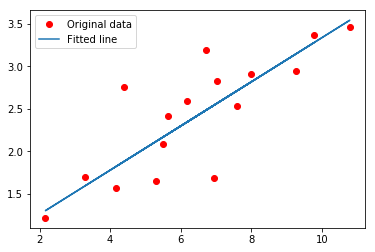

In [60]:
def Pred(row,m,c):
    sum_ = c
    sum_ += m * row
    return sum_

def SGD(train, l_rate, epoch):
    start=time()
    m=0.0
    c=0.0
    global err
    global v
    flag =0
    prev_err=0.0
    for ep in range(epoch):
        sum_error = 0
        for row in train:
            pred = Pred(row[0], m,c)
            error = pred - row[-1]
            sum_error += error**2
            
            for i in range(len(row)-1):
                c = c - l_rate * error
                m = m - l_rate * error * row[i]
                
        sum_error/=(2*len(train_X))
        if sum_error == prev_err:
            flag=flag+1
        else:
            prev_err = sum_error
            flag=0
        if flag >= 5:
            print(ep)
            break
    elapsed = time() - start    
    print('>error=%.5f Time:%.5f\n' % (sum_error,elapsed))
    if(sum_error < err):
        err=sum_error
        v = [l_rate, epoch,m,c]
    return v

train_X= [3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27]
train_Y =[1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94]

dataset = []
for i in range(len(train_X)):
    dataset.append([train_X[i],train_Y[i]])
err=9999
v =[]
epoch=[2000,1000]
l_rate=[0.0005]
for ep in epoch:
    for l in l_rate:
        print('Epoch=',ep,' and Learn_rate:',l)
        values =SGD(dataset, l, ep)
with tf.Session() as sess:
    print('\n','Minimum Error:')
    print('Epoch:',values[1],' Learning Rate:',values[0],' m=',values[2],' c=',values[3])
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(tf.multiply(values[2],train_X)+values[3]), label='Fitted line')
    plt.legend()
    plt.show()
    sess.close()

# Random Coefficients

Epoch= 2000  and Learn_rate: 0.0005
>error=0.08032 Time:0.02371

Epoch= 1000  and Learn_rate: 0.0005
>error=0.08033 Time:0.03125


 Minimum Error:
Epoch: 2000  Learning Rate: 0.0005  m= 0.23863582723732296  c= 0.8938966181236127


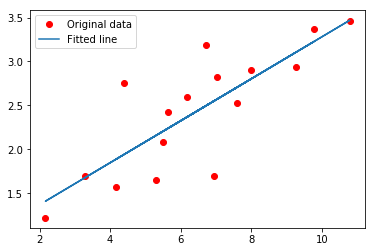

In [61]:
def Pred(row,m,c):
    sum_ = c
    sum_ += m * row
    return sum_

def SGD(train, l_rate, epoch):
    start=time()
    m=rng.random()
    c=rng.random()
    global err
    global v
    flag =0
    prev_err=0.0
    for ep in range(epoch):
        sum_error = 0
        for row in train:
            pred = Pred(row[0], m,c)
            error = pred - row[-1]
            sum_error += error**2
            
            for i in range(len(row)-1):
                c = c - l_rate * error
                m = m - l_rate * error * row[i]
                
        sum_error/=(2*len(train_X))
        if sum_error == prev_err:
            flag=flag+1
        else:
            prev_err = sum_error
            flag=0
        if flag >= 5:
            print(ep)
            break
    elapsed = time() - start    
    print('>error=%.5f Time:%.5f\n' % (sum_error,elapsed))
    if(sum_error < err):
        err=sum_error
        v = [l_rate, epoch,m,c]
    return v

train_X= [3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27]
train_Y =[1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94]

dataset = []
for i in range(len(train_X)):
    dataset.append([train_X[i],train_Y[i]])
err=9999
v =[]
epoch=[2000,1000]
l_rate=[0.0005]
for ep in epoch:
    for l in l_rate:
        print('Epoch=',ep,' and Learn_rate:',l)
        values =SGD(dataset, l, ep)
with tf.Session() as sess:
    print('\n','Minimum Error:')
    print('Epoch:',values[1],' Learning Rate:',values[0],' m=',values[2],' c=',values[3])
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(tf.multiply(values[2],train_X)+values[3]), label='Fitted line')
    plt.legend()
    plt.show()
    sess.close()